타이타닉 데이터셋

In [32]:
'''
import os
import urllib.request

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/titanic/"

def fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    for filename in ("train.csv", "test.csv"):
        filepath = os.path.join(path, filename)
        if not os.path.isfile(filepath):
            print("Downloading", filename)
            urllib.request.urlretrieve(url + filename, filepath)

fetch_titanic_data()   
'''

'\nimport os\nimport urllib.request\n\nTITANIC_PATH = os.path.join("datasets", "titanic")\nDOWNLOAD_URL = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/titanic/"\n\ndef fetch_titanic_data(url=DOWNLOAD_URL, path=TITANIC_PATH):\n    if not os.path.isdir(path):\n        os.makedirs(path)\n    for filename in ("train.csv", "test.csv"):\n        filepath = os.path.join(path, filename)\n        if not os.path.isfile(filepath):\n            print("Downloading", filename)\n            urllib.request.urlretrieve(url + filename, filepath)\n\nfetch_titanic_data()   \n'

In [33]:
import pandas as pd
import os

TITANIC_PATH = os.path.join("datasets", "titanic")
DOWNLOAD_URL = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/datasets/titanic/"

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [34]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


속성은 다음과 같은 의미를 가집니다:

* **PassengerId**: 각 승객의 고유 식별자.
* **Survived**: 타깃입니다. 0은 생존하지 못한 것이고 1은 생존을 의미합니다.
* **Pclass**: 승객 등급. 1, 2, 3등석.
* **Name**, **Sex**, **Age**: 이름 그대로 의미입니다.
* **SibSp**: 함께 탑승한 형제, 배우자의 수.
* **Parch**: 함께 탑승한 자녀, 부모의 수.
* **Ticket**: 티켓 아이디
* **Fare**: 티켓 요금 (파운드)
* **Cabin**: 객실 번호
* **Embarked**: 승객이 탑승한 곳. C(Cherbourg), Q(Queenstown), S(Southampton)

`PassengerId` 열을 인덱스 열로 지정:

In [36]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

누락된 데이터 확인

In [37]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [38]:
train_data[train_data["Sex"]=="female"]["Age"].median()

27.0

좋습니다. **Age**, **Cabin**, **Embarked** 속성의 일부가 null입니다(891개의 non-null 보다 작습니다). 

특히 **Cabin**은 77%가 null입니다. 일단 **Cabin**은 무시하고 나머지를 활용

**Age**는 19%가 null이므로 이를 어떻게 처리할지 결정해야 함. null을 중간나이로 바꾸는 것이 괜찮아 보임. 

다른 열을 사용해 나이를 예측하는 것(예를 들어, 1등석의 중간 나이는 37, 2등석은 29, 3등석은 24입니다)이 

조금 현명해 보일 수 있지만 단순함을 위해 전체의 중간 나이를 사용.

**Name**과 **Ticket** 속성도 값을 가지고 있지만 머신러닝 모델이 사용할 수 있는 숫자로 변환하는 것이 조금 까다롭습니다. 

그래서 지금은 이 두 속성을 무시하겠습니다.

In [39]:
train_data.describe() # 통계량 요약해서 출력

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 38%만 **Survived**입니다. 거의 40%에 가까우므로 정확도를 사용해 모델을 평가해도 괜찮을 것 같음

* 평균 **Fare**는 32.20 파운드라 그렇게 비싸보이지는 않음(아마 요금을 많이 반환해 주었기 때문일 것임)

* 평균 **Age**는 30보다 작습니다.

타깃이 0과 1로 이루어졌는지 확인합니다:

In [40]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

범주형 특성들을 확인

In [41]:
print("-" * 40)

print(train_data["Pclass"].value_counts())
print("-" * 40)
print(train_data["Sex"].value_counts())
print("-" * 40)
print(train_data["Embarked"].value_counts())

----------------------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
----------------------------------------
male      577
female    314
Name: Sex, dtype: int64
----------------------------------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64


**Embarked** 특성은 승객이 탑승한 곳을 알려줌: C=Cherbourg, Q=Queenstown, S=Southampton.



class sklearn.impute.SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, verbose=0, copy=True, add_indicator=False)

-----------------------------------------------------------------------------

1. missing_values = {int, float, str, np.nan or None}, default=np.nan


2. strategy = str, default=’mean’ 

> mean, median, constant : 숫자형

> most_frequent : 숫자형, 범주형


3. fill_value = {str, numerical value}, default=None

> strategy == constant(상수)인 경우, 사용


4. verbose = int, default=0


5. copy = bool, default=True

> If True, a copy of X will be created. If False, imputation will be done in-place whenever possible. 

> true면 복사본을 만들어서 imputation할거고, false면 그냥 imputation한다.


6. add_indicator = bool, default=False

> If True, a MissingIndicator transform will stack onto output of the imputer’s transform. This allows a predictive estimator to account for missingness despite imputation. If a feature has no missing values at fit/train time, the feature won’t appear on the missing indicator even if there are missing values at transform/test time.

> true면 missingindicator를 추가한다. = 결측치 열이 생긴다.   

> 이러면 예측추정기 + 결측치를 없애는 imputation이라도 결측치의 수를 설명할 수 있다.

> fit/train에 결측치가 없는 변수면 transform/test에 결측치가 있더라도 missingindicator에 보여주지 않길 바란다.                                     

수치 특성을 위한 파이프라인부터 시작해서 전처리 파이프라인을 만들어 보죠:

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

이제 범주형 특성을 위한 파이프라인 제작

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

마지막으로 숫자와 범주형 파이프라인을 연결합니다:

In [44]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])
# ColumnTransformer([튜플 1, 튜플 2 [...]])
# 각 튜플은 이름, 변환기, 변환기가 적용될 열 이름

이제 원본 데이터를 받아 머신러닝 모델에 주입할 숫자입력특성을 출력하는 전처리 파이프라인을 만듦.

* ### fit(X, y=None, sample_weight=None)

Compute the mean and std to be used for later scaling. 나중에 스케일링에 사용할 평균과 표준편차를 계산

* ### transform(X, copy=None)

Perform standardization by centering and scaling. 센터링 및 스케일링으로 표준화 수행

* ### fit_transform(X, y=None, **fit_params)

Fit to data, then transform it.

In [45]:
X_train = preprocess_pipeline.fit_transform(train_data[num_attribs + cat_attribs])
y_train = train_data["Survived"]

이제 분류기를 훈련시킬 차례입니다. 먼저 `RandomForestClassifier`를 사용해 보겠습니다:

In [46]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

모델이 잘 훈련된 것 같습니다. 이를 사용해서 테스트 세트에 대한 예측을 만듭니다:

In [47]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

이 예측 결과를 (캐글에서 기대하는 형태인) CSV 파일로 만들어 업로드하고 평가를 받아볼 수 있습니다. 

하지만 그냥 좋을거라 기대하는 것보다 교차 검증으로 모델이 얼마나 좋은지 평가하는 것이 좋습니다.

In [48]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8092759051186016

아주 나쁘지 않네요! 캐글에서 타이타닉 경연 대회의 [리더보드](https://www.kaggle.com/c/titanic/leaderboard)에서 상위 2% 안에 든 점수를 볼 수 있습니다. 

와우! 어떤 사람들은 100%를 달성했습니다. 하지만 타이타닉의 [희생자 목록](https://www.encyclopedia-titanica.org/titanic-victims/)을 쉽게 찾을 수 있으므로 

머신러닝을 사용하지 않고도 이런 정확도를 달성할 수 있습니다! 

`SVC`를 적용해 보겠습니다:

In [49]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

하지만 10 폴드 교차 검증에 대한 평균 정확도를 보는 대신 모델에서 얻은 

10개의 점수를 1사분위, 3사분위를 명료하게 표현해주는 상자 수염 그림(box-and-whisker) 그래프를 만들어 보겠습니다

`boxplot()` 함수는 이상치(플라이어(flier)라고 부릅니다)를 감지하고 

수염 부분에 이를 포함시키지 않습니다. 1사분위가 $Q_1$이고 3사분위가 $Q_3$이라면 사분위수 범위는 

$IQR = Q_3 - Q_1$가 됩니다(이 값이 박스의 높이가 됩니다). 

$Q_1 - 1.5 \times IQR$ 보다 낮거나 $Q_3 + 1.5 \times IQR$ 보다 높은 점수는 이상치로 간주됩니다.

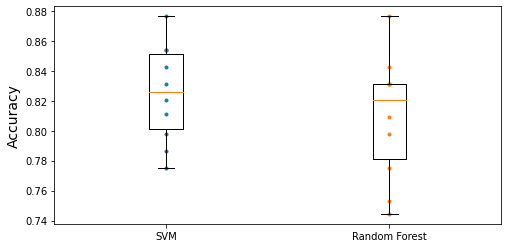

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

랜덤 포레스트 분류기가 10개의 폴드 중 하나에서 매우 높은 점수를 얻었지만 

넓게 퍼져 있기 때문에 전체적인 평균 점수는 낮습니다. 따라서 SVM 분류기가 일반화를 더 잘하는 것 같습니다.

이 결과를 더 향상시키려면:

* 교차 검증과 그리드 탐색을 사용하여 더 많은 모델을 비교하고 하이퍼파라미터를 튜닝하세요.

* 특성 공학을 더 시도해 보세요, 예를 들면:

  * 수치 특성을 범주형 특성으로 바꾸어 보세요: 예를 들어, 나이대가 다른 경우 다른 생존 비율을 가질 수 있습니다(아래 참조). 그러므로 나이 구간을 범주로 만들어 나이 대신 사용하는 것이 도움이 될 수 있스니다. 비슷하게 생존자의 30%가 혼자 여행하는 사람이기 때문에 이들을 위한 특별한 범주를 만드는 것이 도움이 될 수 있습니다(아래 참조).

  * **SibSp**와 **Parch**을 이 두 특성의 합으로 바꿉니다.

  * **Survived** 특성과 관련된 이름을 구별해 보세요.

  * **Cabin** 열을 사용하세요. 예를 들어 첫 글자를 범주형 속성처럼 다룰 수 있습니다.

In [51]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [52]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
